In [ ]:
#Installing packages
!pip install mglearn
!pip install pydotplus
!pip install xgboost
!pip install graphviz

In [302]:
# Importing Packages
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import glob
import math
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
import mglearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from mglearn.plot_helpers import cm2, cm3, discrete_scatter
from sklearn.decomposition import PCA
from sklearn.tree._tree import TREE_LEAF
from IPython.display import display, Image
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn.tree import _tree
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit,learning_curve
import matplotlib.patches as mpatches
import time
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
import statsmodels.formula.api as sm
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

In [303]:
warnings.filterwarnings("ignore")

In [304]:
os.environ["PATH"] += os.pathsep + 'C:/Users/laksh/Anaconda3/Library/bin/' 

In [305]:
# Changing Directory
os.chdir("A:\Semester 2\Machine Learning\Dataset\Data")

In [306]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [307]:
def plot_learning_t_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Test score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [308]:
def graph_roc_curve_multiple(XGboost_tree_fpr, XGboost_tree_tpr,svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y, tree_pred)))
    plt.plot(XGboost_tree_fpr, XGboost_tree_tpr, label='XGboost Decision Tree Classifier Score: {:.4f}'.format(
         roc_auc_score(y,tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

In [309]:
def graph_roc_curve_t_multiple(XGboost_tree_fpr, XGboost_tree_tpr,svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)))
    plt.plot(XGboost_tree_fpr, XGboost_tree_tpr, label='XGboost Decision Tree Classifier Score: {:.4f}'.format(
         roc_auc_score(y,tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

# FaceBook Data Set

In [310]:
labels = np.array(['Page Popularity/likes','Page Checkins','Page talking about','Page Category',
'D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29',
'CC1','CC2','CC3','CC4','CC5','Base Time','Post Length','Post Share Count','Post Promotion Status','H Local',
'Post published weekday1','Post published weekday2','Post published weekday3','Post published weekday4','Post published weekday5','Post published weekday6','Post published weekday7',
'Base DateTime weekday1','Base DateTime weekday2','Base DateTime weekday3','Base DateTime weekday4','Base DateTime weekday5','Base DateTime weekday6','Base DateTime weekday7',
'Target Variable'])
len(labels)

54

In [311]:
# Merging the Data 
allFiles = glob.glob("A:\Semester 2\Machine Learning\Dataset\Data"+"/*.csv")

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=None,names = labels)
    list_.append(df)

frame = pd.concat(list_, axis = 0, ignore_index = True,sort=False)

# Preprocessing Data

In [312]:
elist=[]
for i in range(len(frame['Target Variable'])): 
    if frame['Target Variable'][i] >=  10:
        elist.append(1)
    else:
        elist.append(0)
frame['Target Variable']  = elist        

In [313]:
frame  = frame.loc[:,frame.columns != 'Post Promotion Status']

In [314]:
# Scaling the data
# compute the minimum value per feature on the training set
min_on_training = frame.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (frame - min_on_training).max(axis=0)

# subtract the min, and divide by range afterward, min=0 and max=1 for each feature
frame_scale = (frame - min_on_training) / range_on_training

In [315]:
# Checking whether dataset is balanced or not
print ('count of 1: {:.0f}' .format(len(frame_scale[frame_scale['Target Variable'] == 1])))
print ('count of 0: {:.0f}' .format(len(frame_scale[frame_scale['Target Variable'] == 0])))

count of 1: 5256
count of 0: 36693


Text(0.5, 1.0, 'Target variable Distributions \n (0: No Comments || 1: Comments)')

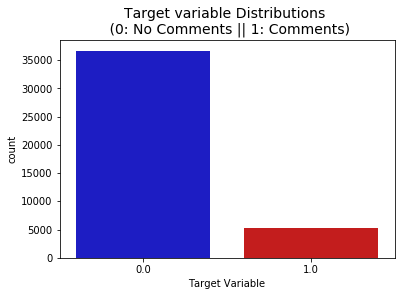

In [344]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Target Variable', data=frame_scale, palette=colors)
plt.title('Target variable Distributions \n (0: No Comments || 1: Comments)', fontsize=14)

In [321]:
# Since our Target Variables are highly skewed we should make them equivalent in order to have a normal distribution 
# of the Target Variables.

# Lets shuffle the data before creating the subsamples

df = frame_scale.sample(frac=1)

# amount of comments in Target Variable is 5256.
comment_df = df.loc[df['Target Variable'] == 1]
non_comment_df = df.loc[df['Target Variable'] == 0][:5256]

normal_distributed_df = pd.concat([comment_df, non_comment_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Page Popularity/likes,Page Checkins,Page talking about,Page Category,D5,D6,D7,D8,D9,D10,...,Post published weekday6,Post published weekday7,Base DateTime weekday1,Base DateTime weekday2,Base DateTime weekday3,Base DateTime weekday4,Base DateTime weekday5,Base DateTime weekday6,Base DateTime weekday7,Target Variable
40132,0.003180,0.009816,0.008785,0.076190,0.0,0.517495,0.034307,0.017941,0.126840,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25720,0.000002,0.000000,0.000003,0.200000,0.0,0.006298,0.000851,0.000427,0.002898,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15390,0.009295,0.000000,0.016381,0.076190,0.0,0.263121,0.028112,0.012388,0.097624,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5262,0.012611,0.098697,0.042753,0.333333,0.0,0.529741,0.103558,0.070483,0.220892,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
32257,0.000202,0.000000,0.000272,0.333333,0.0,0.136809,0.014642,0.009398,0.040085,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


Distribution of the Target Variable in the subsample dataset
0.0    0.5
1.0    0.5
Name: Target Variable, dtype: float64


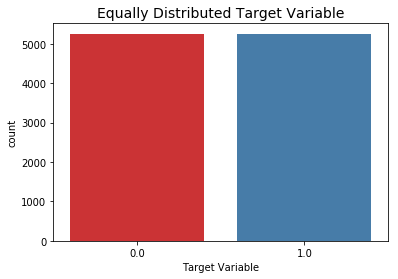

In [322]:
print('Distribution of the Target Variable in the subsample dataset')
print(new_df['Target Variable'].value_counts()/len(new_df))



sns.countplot('Target Variable', data=new_df, palette="Set1")
plt.title('Equally Distributed Target Variable', fontsize=14)
plt.show()

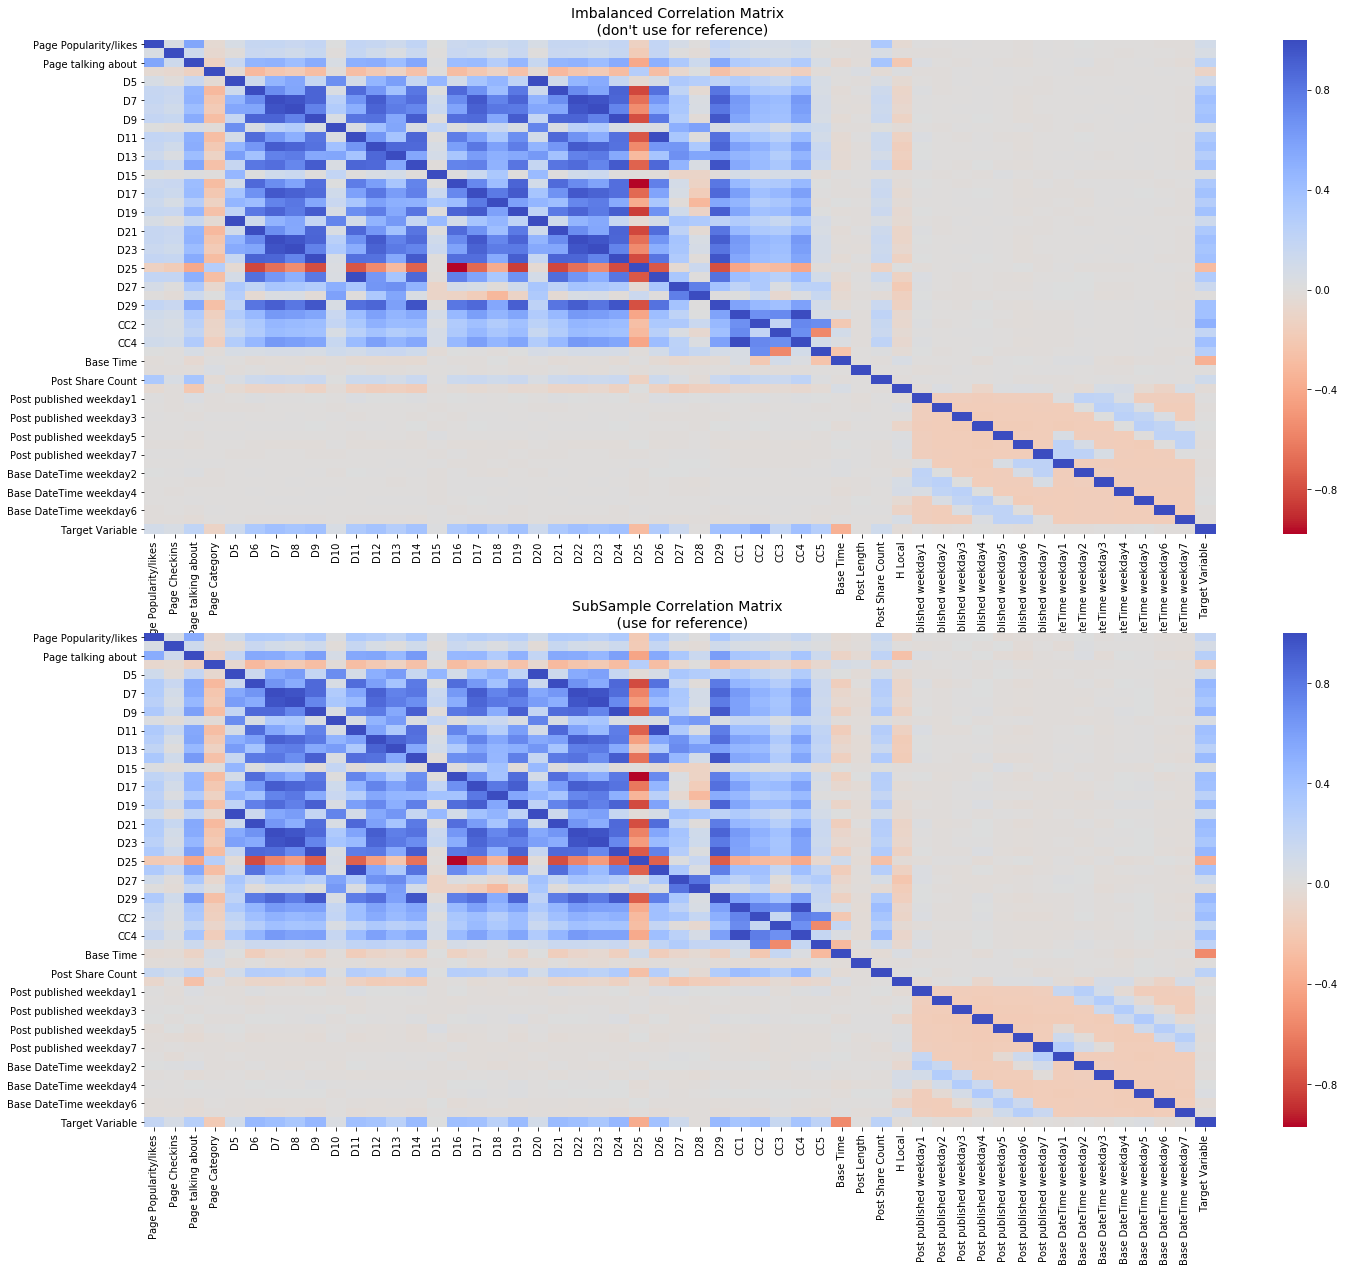

In [323]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

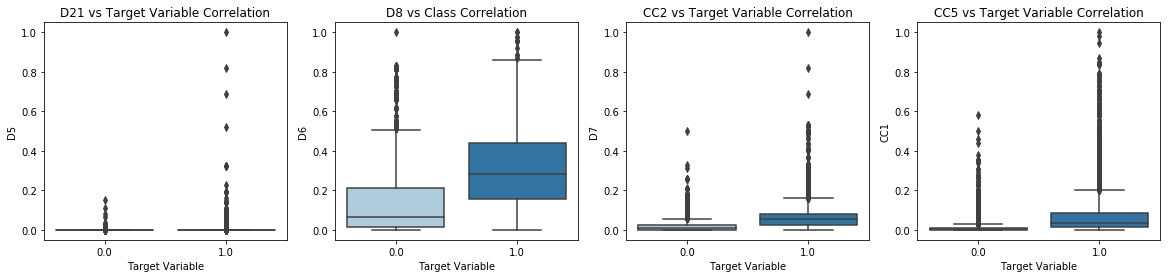

In [324]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Correlations with our Target Variable 
sns.boxplot(x="Target Variable", y="D5", data=new_df, palette="Paired", ax=axes[0])
axes[0].set_title('D21 vs Target Variable Correlation')

sns.boxplot(x="Target Variable", y="D6", data=new_df, palette="Paired", ax=axes[1])
axes[1].set_title('D8 vs Class Correlation')

sns.boxplot(x="Target Variable", y="D7", data=new_df, palette="Paired", ax=axes[2])
axes[2].set_title('CC2 vs Target Variable Correlation')

sns.boxplot(x="Target Variable", y="CC1", data=new_df, palette="Paired", ax=axes[3])
axes[3].set_title('CC5 vs Target Variable Correlation')



plt.show()

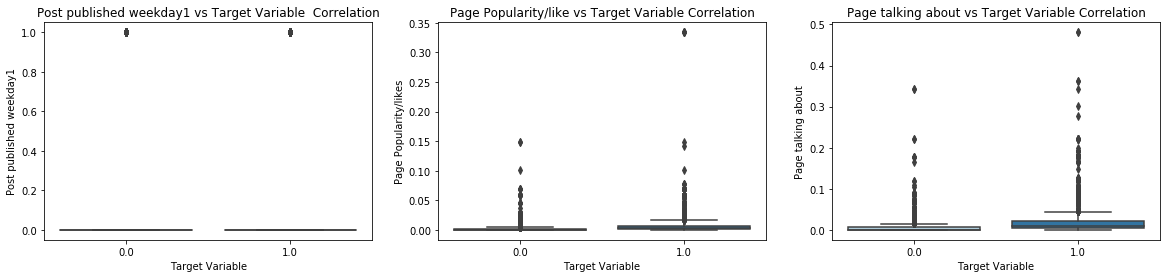

In [325]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Correlations with our Target Variable 

sns.boxplot(x="Target Variable", y="Post published weekday1", data=new_df, palette="Paired", ax=axes[0])
axes[0].set_title('Post published weekday1 vs Target Variable  Correlation')

sns.boxplot(x="Target Variable", y="Page Popularity/likes", data=new_df, palette="Paired", ax=axes[1])
axes[1].set_title('Page Popularity/like vs Target Variable Correlation')

sns.boxplot(x="Target Variable", y="Page talking about", data=new_df, palette="Paired", ax=axes[2])
axes[2].set_title('Page talking about vs Target Variable Correlation')


plt.show()

In [340]:
# New_df is from the random undersample data (fewer instances)

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 1.6e+02 s


In [ ]:

f, (ax1) = plt.subplots(1, figsize=(8,6))
labels = ['No Comments', 'Comments']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Comments')
red_patch = mpatches.Patch(color='#AF0000', label='Comments')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Comments', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Comments', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

In [326]:
# Splitting the data
train, test = train_test_split(frame_scale, train_size = 0.7, test_size = 0.3,random_state = 1,shuffle = False)

In [327]:
print('Train')
print ('count of 1: {:.0f}' .format(len(train[train['Target Variable'] == 1])))
print ('count of 0: {:.0f}' .format(len(train[train['Target Variable'] == 0])))
print('Test')
print ('count of 1: {:.0f}' .format(len(test[test['Target Variable'] == 1])))
print ('count of 0: {:.0f}' .format(len(test[test['Target Variable'] == 0])))

Train
count of 1: 3540
count of 0: 25824
Test
count of 1: 1716
count of 0: 10869


In [328]:
df = train
df_test = test

# Train Data

In [330]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select best 10 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(new_df.iloc[:,0:52], new_df["Target Variable"])
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True False  True False False False
 False False False False  True False False False False  True False False
 False False False False False  True  True  True  True  True  True False
 False False False False False False False False False False False False
 False False False False]
[ 3 15 41 18 37  6  1  4  1 42 21  7  8 14 43 17  1  2  9 35 13  1  5 11
 10 20 38 19 34  1  1  1  1  1  1 22 16 12 29 31 33 26 32 30 28 39 25 23
 27 40 24 36]


In [331]:
# Defining X variables
X= np.array([new_df.iloc[:,6],new_df.iloc[:,8],new_df.iloc[:,16],new_df.iloc[:,21],new_df.iloc[:,29],new_df.iloc[:,30],
             new_df.iloc[:,31],new_df.iloc[:,32],new_df.iloc[:,33],new_df.iloc[:,34]])
X = np.transpose(X)

In [332]:
# Defining dependent Target Variable
y = np.array(new_df['Target Variable'])

# Support Vector Machine 

In [360]:
# Run SVM only for train data
t0 = time.time()
linear_svm = SVC(kernel='linear', C=0.1, gamma=10).fit(X, y)
t1 = time.time()
print("Linear Model took {:.2} s".format(t1 - t0))
linear_time = t1 - t0

t2 = time.time()
RBF_svm = SVC(kernel='rbf', C=0.1, gamma=10).fit(X, y)
t3 = time.time()
print("RBF Model took {:.2} s".format(t3 - t2))
RBF_time = t3 - t2

t4 = time.time()
Poly_svm = SVC(kernel='poly', C=0.1,degree=3, gamma=10).fit(X, y)
t5 = time.time()
print("RBF Model took {:.2} s".format(t5 - t4))
Poly_time = t5 - t4

Linear Model took 2.5 s
RBF Model took 2.5 s
RBF Model took 2.6 s


In [334]:
# Predicted Target Values
linear_pred = linear_svm.predict(X)
RBF_pred = RBF_svm.predict(X)
Poly_pred = Poly_svm.predict(X)

In [335]:
# Confusion Matrix for Linear Model
linear_cm = np.array(confusion_matrix(y,linear_pred))
linear_matrix = pd.DataFrame(linear_cm,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
linear_matrix

,Actual Comments,Actual No comments
Predicted Comments,4222,1034
Predicted No comments,383,4873


In [336]:
# Confusion Matrix for RBF Model
RBF_cm = np.array(confusion_matrix(y,RBF_pred))
RBF_matrix = pd.DataFrame(RBF_cm,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
RBF_matrix

,Actual Comments,Actual No comments
Predicted Comments,4592,664
Predicted No comments,395,4861


In [337]:
# Confusion Matrix for Polynomial Model
Poly_cm = np.array(confusion_matrix(y,Poly_pred))
Poly_matrix = pd.DataFrame(Poly_cm,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
Poly_matrix

,Actual Comments,Actual No comments
Predicted Comments,4653,603
Predicted No comments,345,4911


In [359]:
# Accuracy of three SVM Models
print("Linear Model accuracy: {:.3f}".format( accuracy_score(y,linear_pred)))
print("RBF Model accuracy: {:.3f}".format(accuracy_score(y,RBF_pred)))
print("Polynomial Model accuracy: {:.3f}".format(accuracy_score(y,Poly_pred)))

Linear Model accuracy: 0.865
RBF Model accuracy: 0.899
Polynomial Model accuracy: 0.910


In [339]:
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X, y)

# SVC best estimator
svc = grid_svc.best_estimator_


# Decision Tree

In [363]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
t2 = time.time()
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params).fit(X, y)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))


# tree best estimator
tree_clf = grid_tree.best_estimator_

Decision Tree Model took 0.57 s


In [364]:
# Confusion Matrix for Decision Tree 
Decision_Tree_pred = tree_clf.predict(X)
DT_cm = np.array(confusion_matrix(y,Decision_Tree_pred))
DT_Conf_matrix = pd.DataFrame(DT_cm,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
DT_Conf_matrix

,Actual Comments,Actual No comments
Predicted Comments,4550,706
Predicted No comments,179,5077


In [366]:
print("Decision Tree Accuracy on training set: {:.4f}".format(accuracy_score(y,Decision_Tree_pred)))

Decision Tree Accuracy on training set: 0.9158


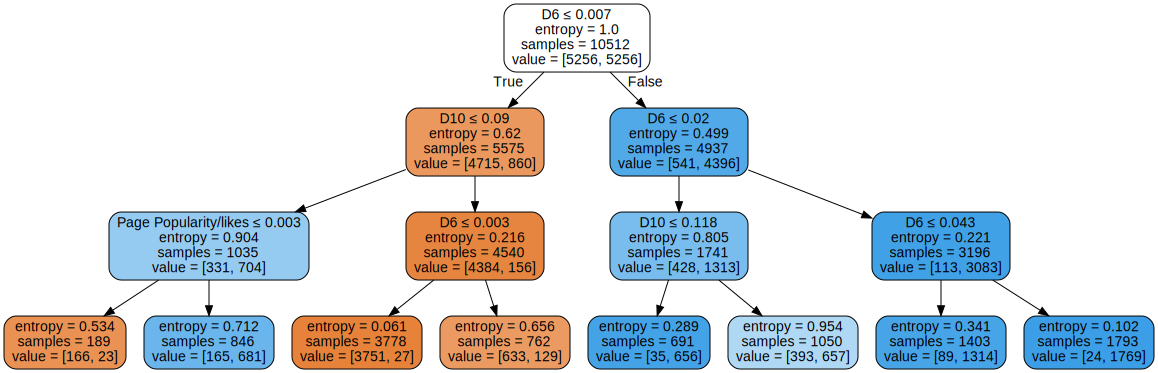

In [373]:
# Plotting Decision Tree
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                             feature_names=train.columns[:10],  
                             filled=True, rounded=True,  
                             special_characters=True)  
graph = graphviz.Source (dot_data)
graph

([<matplotlib.axis.XTick at 0x2860d6426a0>,
 <a list of 10 Text xticklabel objects>)

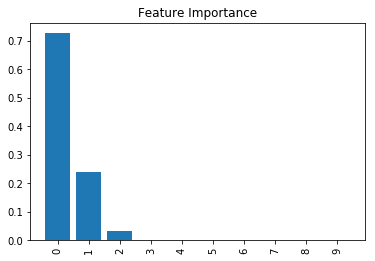

In [374]:
# Feature Importance
importances = tree_clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), rotation=90)

# Show plot

# Boosted Decision Tree

In [377]:
# Boosted DecisionTree Classifier
XGboost_tree_params = { "max_depth": list(range(2,4,1)),
              "reg_lambda": list(range(5,7,1))}
t2 = time.time()
XGboost_grid_tree = GridSearchCV(XGBClassifier(), XGboost_tree_params).fit(X, y)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))


# tree best estimator
XGboost_tree_clf = XGboost_grid_tree.best_estimator_

print("XGboost Boosted Decision Tree Accuracy on training set: {:.3f}".format(XGboost_tree_clf.score(X, y)))

Decision Tree Model took 1.1e+01 s
XGboost Boosted Decision Tree Accuracy on training set: 0.932


([<matplotlib.axis.XTick at 0x2860da8cf28>,
 <a list of 10 Text xticklabel objects>)

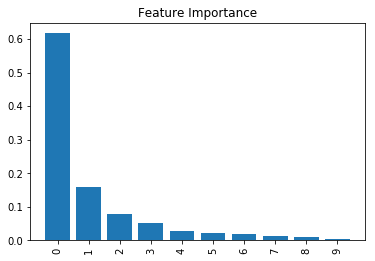

In [380]:
# Feature Importance
importances = XGboost_tree.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), rotation=90)

# Show plot

# Test Data

In [381]:
# Defining X variables
X_test= np.array([new_df_test.iloc[:,6],new_df_test.iloc[:,8],new_df_test.iloc[:,16],new_df_test.iloc[:,21],new_df_test.iloc[:,29],new_df_test.iloc[:,30],
             new_df_test.iloc[:,31],new_df_test.iloc[:,32],new_df_test.iloc[:,33],new_df_test.iloc[:,34]])
X_test = np.transpose(X_test)

In [382]:
# Defining dependent Target Variable
y_test = np.array(new_df_test['Target Variable'])

# Support Vector Machine 


In [385]:
# Run Logistic Regressions only for train data
# Run SVM only for train data
t0 = time.time()
linear_svm_test = SVC(kernel='linear', C=0.1, gamma=10).fit(X_test, y_test)
t1 = time.time()
print("Linear Model took {:.2} s".format(t1 - t0))
linear_time = t1 - t0

t2 = time.time()
RBF_svm_test = SVC(kernel='rbf', C=0.1, gamma=10).fit(X_test, y_test)
t3 = time.time()
print("RBF Model took {:.2} s".format(t3 - t2))
RBF_time = t3 - t2

t4 = time.time()
Poly_svm_test = SVC(kernel='poly', C=0.1,degree=3, gamma=10).fit(X_test,y_test)
t5 = time.time()
print("RBF Model took {:.2} s".format(t5 - t4))
Poly_time = t5 - t4


Linear Model took 0.74 s
RBF Model took 0.92 s
RBF Model took 0.84 s


In [ ]:
# Predicted Target Values
linear_pred_test = linear_svm_test.predict(X_test)
RBF_pred_test = RBF_svm_test.predict(X_test)
Poly_pred_test = Poly_svm_test.predict(X_test)

In [ ]:
# Confusion Matrix for Linear Model
linear_cm_test = np.array(confusion_matrix(y_test,linear_pred_test))
linear_matrix_test = pd.DataFrame(linear_cm_test,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
linear_matrix_test

In [ ]:
# Confusion Matrix for RBF Model
RBF_cm_test = np.array(confusion_matrix(y_test,RBF_pred_test))
RBF_matrix_test = pd.DataFrame(RBF_cm_test,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
RBF_matrix_test

In [ ]:
# Confusion Matrix for Polynomial Model
Poly_cm_test = np.array(confusion_matrix(y_test,Poly_pred_test))
Poly_matrix_test = pd.DataFrame(Poly_cm_test,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
Poly_matrix_test

In [389]:
# Accuracy of three SVM Models
# Accuracy of three SVM Models
print("Linear Model accuracy: {:.3f}".format(accuracy_score(y_test,linear_pred_test)))
print("RBF Model accuracy: {:.3f}".format(accuracy_score(y_test,RBF_pred_test)))
print("Polynomial Model accuracy: {:.3f}".format(accuracy_score(y_test,Poly_pred_test)))

Linear Model accuracy: 0.867
RBF Model accuracy: 0.898
Polynomial Model accuracy: 0.904


In [ ]:
svc_params_test = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc_test = GridSearchCV(SVC(), svc_params_test)
grid_svc_test.fit(X_test, y_test)

# SVC best estimator
svc_test = grid_svc.best_estimator_

# Decision Tree

In [390]:
# DecisionTree Classifier
tree_params_test = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
t2 = time.time()
grid_tree_test = GridSearchCV(DecisionTreeClassifier(), tree_params_test).fit(X, y)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))

# tree best estimator
tree_clf_test = grid_tree_test.best_estimator_

Decision Tree Model took 0.57 s


In [ ]:
# Confusion Matrix for Decision Tree 
Decision_Tree_pred_test = tree_clf_test.predict(X_test)
DT_cm_test = np.array(confusion_matrix(y_test,Decision_Tree_pred_test))
DT_Conf_matrix_test = pd.DataFrame(DT_cm_test,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
DT_Conf_matrix_test

In [391]:
print("Decision Tree Accuracy on training set: {:.4f}".format(accuracy_score(y_test,Decision_Tree_pred_test)))

Decision Tree Accuracy on training set: 0.9068


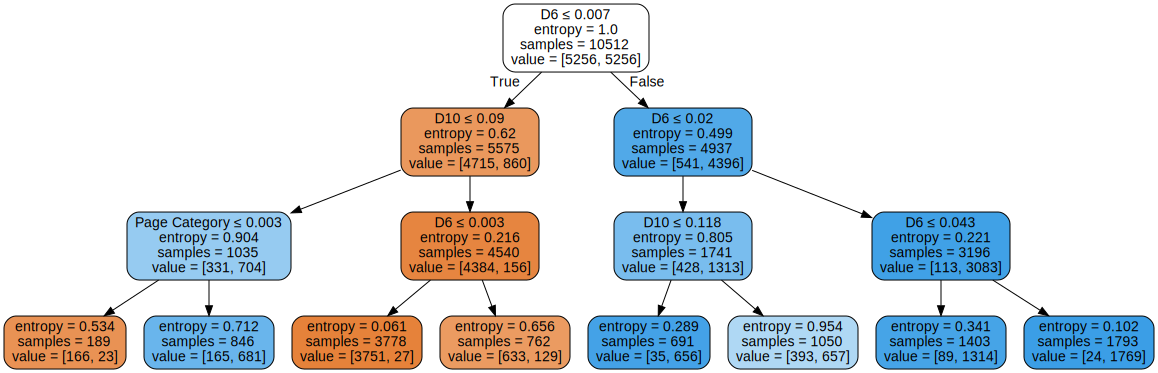

In [392]:
# Plotting Decision Tree
dot_data = tree.export_graphviz(tree_clf_test, out_file=None, 
                             feature_names=train.columns[:10],  
                             filled=True, rounded=True,  
                             special_characters=True)  
graph = graphviz.Source (dot_data)
graph

([<matplotlib.axis.XTick at 0x286078e43c8>,
 <a list of 10 Text xticklabel objects>)

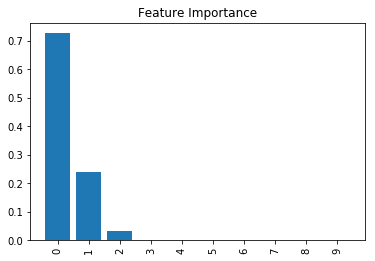

In [393]:
# Feature Importance
importances = tree_clf_test.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_test.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_test.shape[1]), rotation=90)

# Show plot

# Boosted Decision Tree

In [394]:
# Boosted DecisionTree Classifier
XGboost_tree_params_test = { "max_depth": list(range(2,4,1)),
              "reg_lambda": list(range(5,7,1))}
t2 = time.time()
XGboost_grid_tree_test = GridSearchCV(XGBClassifier(), XGboost_tree_params_test).fit(X, y)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))

# tree best estimator
XGboost_tree_clf_test = XGboost_grid_tree_test.best_estimator_

Decision Tree Model took 5.2 s


In [ ]:
# Confusion Matrix for Decision Tree 
XGboost_Decision_Tree_pred_test = XGboost_tree_clf_test.predict(X_test)
XGboost_DT_cm_test = np.array(confusion_matrix(y_test,XGboost_Decision_Tree_pred_test))
XGboost_DT_Conf_matrix_test = pd.DataFrame(XGboost_DT_cm_test,index = ['Predicted Comments','Predicted No comments'],\
                             columns = ['Actual Comments','Actual No comments'])
XGboost_DT_Conf_matrix_test

In [395]:
print("Decision Tree Accuracy on training set: {:.4f}".format(accuracy_score(y_test,XGboost_Decision_Tree_pred_test)))

Decision Tree Accuracy on training set: 0.9316


([<matplotlib.axis.XTick at 0x286060437f0>,
 <a list of 10 Text xticklabel objects>)

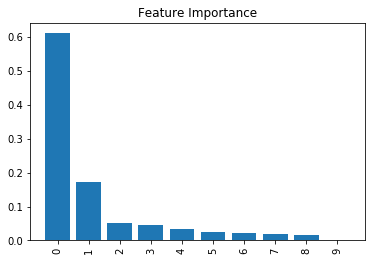

In [396]:
# Feature Importance
importances = XGboost_tree_test.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_test.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_test.shape[1]), rotation=90)

# Show plot

# Learning Curves

# Train Data

In [272]:
# Overfitting Case

svc_score = cross_val_score(svc, X, y, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X, y, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

XGboost_tree_score = cross_val_score(XGboost_tree_clf, X, y, cv=5)
print('XGboost_tree_score DecisionTree Classifier Cross Validation Score', \
      round(XGboost_tree_score.mean() * 100, 2).astype(str) + '%')

Support Vector Classifier Cross Validation Score 88.88%
DecisionTree Classifier Cross Validation Score 90.07%
XGboost_tree_score DecisionTree Classifier Cross Validation Score 92.35%


<module 'matplotlib.pyplot' from 'C:\\Users\\laksh\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

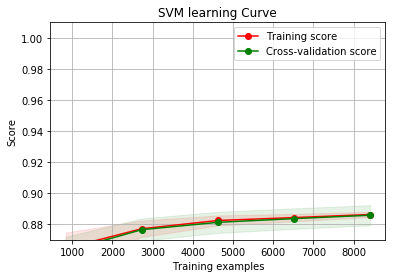

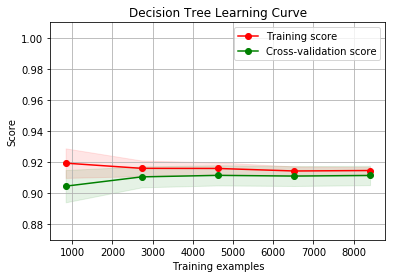

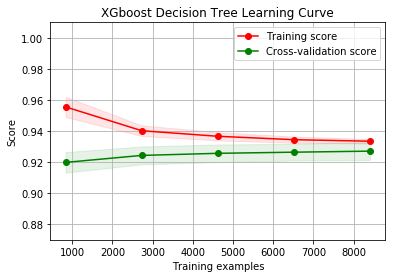

In [397]:
# Learning Curve
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(svc, 'SVM learning Curve', X, y, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_curve(tree_clf,'Decision Tree Learning Curve', X, y, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_curve(XGboost_tree_clf,'XGboost Decision Tree Learning Curve', X, y, (0.87, 1.01), cv=cv, n_jobs=4)

In [279]:
# Create a DataFrame with all the scores and the classifiers names.

svc_pred = cross_val_predict(svc, X, y, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X, y, cv=5)

XGboost_tree_pred = cross_val_predict(XGboost_tree_clf, X, y, cv=5)

In [283]:
print('Support Vector Classifier: ', roc_auc_score(y, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y, tree_pred))
print('XGboost Decision Tree Classifier: ', roc_auc_score(y, XGboost_tree_pred))

Support Vector Classifier:  0.9481026013560259
Decision Tree Classifier:  0.8607744994731296
XGboost Decision Tree Classifier:  0.900038317846537


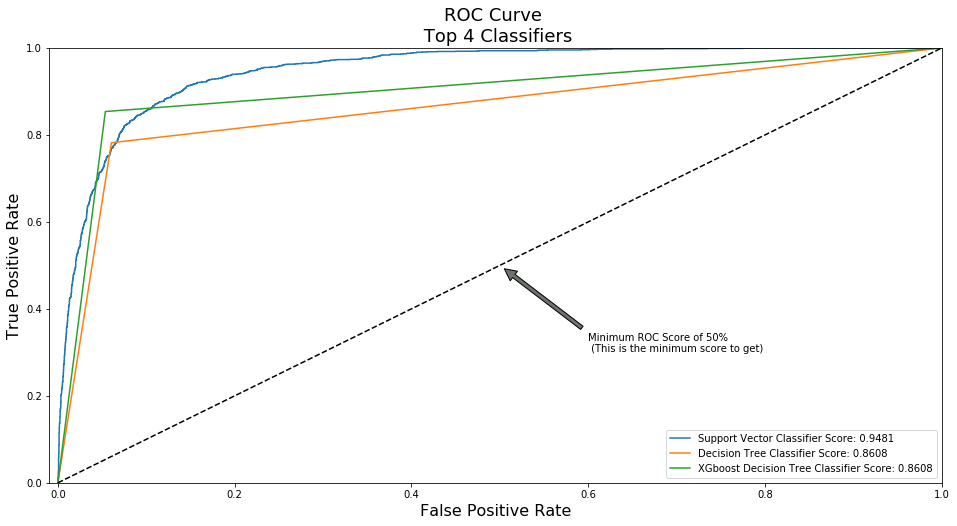

In [289]:
# Plotting ROC Curve
XGboost_tree_fpr, XGboost_tree_tpr, XGboost_tree_threshold = roc_curve(y, XGboost_tree_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y, tree_pred)

    
graph_roc_curve_multiple(XGboost_tree_fpr, XGboost_tree_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

# Test Data

In [273]:
# Overfitting Case

svc_score_test = cross_val_score(svc_test, X_test, y_test, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score_test.mean() * 100, 2).astype(str) + '%')

tree_score_test = cross_val_score(tree_clf_test, X_test, y_test, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score_test.mean() * 100, 2).astype(str) + '%')

XGboost_tree_score_test = cross_val_score(XGboost_tree_clf_test, X_test, y_test, cv=5)
print('XGboost_tree_score DecisionTree Classifier Cross Validation Score', \
      round(XGboost_tree_score_test.mean() * 100, 2).astype(str) + '%')

Support Vector Classifier Cross Validation Score 88.88%
DecisionTree Classifier Cross Validation Score 90.07%
XGboost_tree_score DecisionTree Classifier Cross Validation Score 92.4%


<module 'matplotlib.pyplot' from 'C:\\Users\\laksh\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

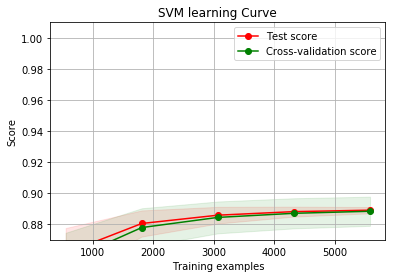

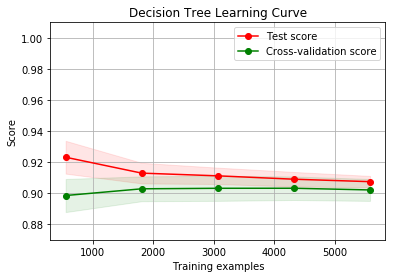

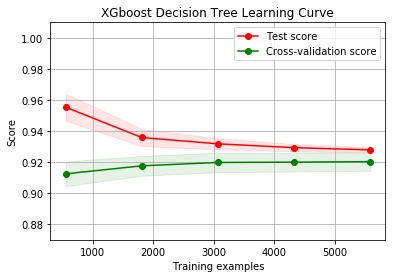

In [277]:
# Learning Curve
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_t_curve(svc_test, 'SVM learning Curve', X_test, y_test, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_t_curve(tree_clf_test,'Decision Tree Learning Curve', X_test, y_test, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_t_curve(XGboost_tree_test,'XGboost Decision Tree Learning Curve', X_test, y_test, (0.87, 1.01),
                    cv=cv, n_jobs=4)

In [280]:
# Create a DataFrame with all the scores and the classifiers names.

svc_pred_test = cross_val_predict(svc_test, X_test, y_test, cv=5,
                             method="decision_function")

tree_pred_test = cross_val_predict(tree_clf_test, X_test, y_test, cv=5)

XGboost_tree_pred_test = cross_val_predict(XGboost_tree_clf_test, X_test, y_test, cv=5)

In [284]:
print('Support Vector Classifier: ', roc_auc_score(y_test, svc_pred_test))
print('Decision Tree Classifier: ', roc_auc_score(y_test, tree_pred_test))
print('XGboost Decision Tree Classifier: ', roc_auc_score(y_test, XGboost_tree_pred_test))

Support Vector Classifier:  0.9481026013560259
Decision Tree Classifier:  0.8607744994731296
XGboost Decision Tree Classifier:  0.9011086896360868


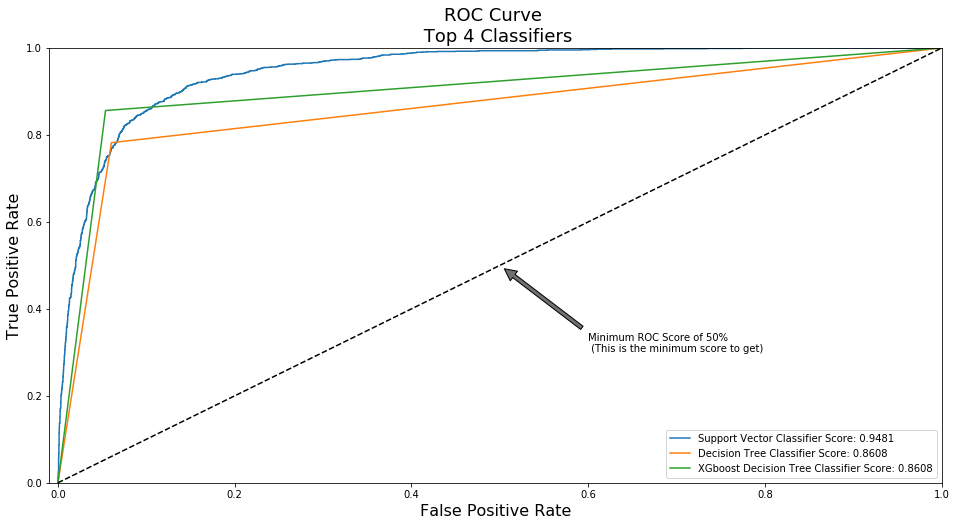

In [291]:
# Plotting ROC Curve
XGboost_tree_fpr, XGboost_tree_tpr, XGboost_tree_threshold = roc_curve(y_test, XGboost_tree_pred_test)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred_test)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred_test)

    
graph_roc_curve_t_multiple(XGboost_tree_fpr, XGboost_tree_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

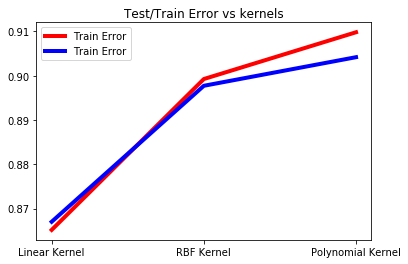

In [356]:
# Kernel Learning Curve
k = ["Linear Kernel","RBF Kernel","Polynomial Kernel"]
Train_error = [accuracy_score(y,linear_pred),accuracy_score(y,RBF_pred),
               accuracy_score(y,Poly_pred)]
Test_error = [accuracy_score(y_test,linear_pred_test),accuracy_score(y_test,RBF_pred_test),
               accuracy_score(y_test,Poly_pred_test)]
plt.plot(k,Train_error,marker = '',color='red',linewidth=4,label='Train Error')
plt.plot(k,Test_error,marker = '',color='blue',linewidth=4,label='Train Error')
plt.title("Test/Train Error vs kernels")
plt.legend()